In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [3]:
# Generate example data (Replace this with your actual dataset)
num_samples = 1000  # Number of samples
num_classes = 10    # Number of classes
X_train = np.random.rand(num_samples, 224, 224, 3).astype(np.float32)  
y_train = np.random.randint(0, num_classes, num_samples)  

print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape) 

X_train shape: (1000, 224, 224, 3)
y_train shape: (1000,)


In [4]:
# Load pre-trained MobileNetV2 model + higher-level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display the model architecture
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [5]:
# Freeze the lower convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Check which layers are frozen
frozen_layers = [layer.name for layer in base_model.layers if not layer.trainable]
print("Frozen layers:", frozen_layers)

Frozen layers: ['input_1', 'Conv1', 'bn_Conv1', 'Conv1_relu', 'expanded_conv_depthwise', 'expanded_conv_depthwise_BN', 'expanded_conv_depthwise_relu', 'expanded_conv_project', 'expanded_conv_project_BN', 'block_1_expand', 'block_1_expand_BN', 'block_1_expand_relu', 'block_1_pad', 'block_1_depthwise', 'block_1_depthwise_BN', 'block_1_depthwise_relu', 'block_1_project', 'block_1_project_BN', 'block_2_expand', 'block_2_expand_BN', 'block_2_expand_relu', 'block_2_depthwise', 'block_2_depthwise_BN', 'block_2_depthwise_relu', 'block_2_project', 'block_2_project_BN', 'block_2_add', 'block_3_expand', 'block_3_expand_BN', 'block_3_expand_relu', 'block_3_pad', 'block_3_depthwise', 'block_3_depthwise_BN', 'block_3_depthwise_relu', 'block_3_project', 'block_3_project_BN', 'block_4_expand', 'block_4_expand_BN', 'block_4_expand_relu', 'block_4_depthwise', 'block_4_depthwise_BN', 'block_4_depthwise_relu', 'block_4_project', 'block_4_project_BN', 'block_4_add', 'block_5_expand', 'block_5_expand_BN', '

In [6]:
# Create a new model with the base and custom classifier
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust the number of classes as needed

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the complete model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2588490 (9.87 MB)
Trainable params: 330506 (1.26 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


2024-10-07 03:42:17.824789: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 481689600 exceeds 10% of free system memory.


Epoch 1/10


2024-10-07 03:42:22.079431: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


 1/25 [>.............................] - ETA: 1:40 - loss: 2.6418 - accuracy: 0.1250

2024-10-07 03:42:22.851691: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


 2/25 [=>............................] - ETA: 18s - loss: 2.7284 - accuracy: 0.1406 

2024-10-07 03:42:23.628341: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


 3/25 [==>...........................] - ETA: 16s - loss: 2.7208 - accuracy: 0.1250

2024-10-07 03:42:24.365663: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


25/25 [==============================] - 29s 1s/step - loss: 2.4959 - accuracy: 0.1013 - val_loss: 2.4049 - val_accuracy: 0.1050
Epoch 2/10
25/25 [==============================] - 24s 955ms/step - loss: 2.3505 - accuracy: 0.1225 - val_loss: 2.3353 - val_accuracy: 0.0800
Epoch 3/10
25/25 [==============================] - 25s 1s/step - loss: 2.3610 - accuracy: 0.1112 - val_loss: 2.3960 - val_accuracy: 0.0800
Epoch 4/10
25/25 [==============================] - 27s 1s/step - loss: 2.3497 - accuracy: 0.0950 - val_loss: 2.3231 - val_accuracy: 0.0600
Epoch 5/10
25/25 [==============================] - 24s 986ms/step - loss: 2.3327 - accuracy: 0.1275 - val_loss: 2.3585 - val_accuracy: 0.1300
Epoch 6/10
25/25 [==============================] - 22s 893ms/step - loss: 2.3204 - accuracy: 0.1475 - val_loss: 2.3722 - val_accuracy: 0.1150
Epoch 7/10
25/25 [==============================] - 23s 905ms/step - loss: 2.2954 - accuracy: 0.1525 - val_loss: 2.3394 - val_accuracy: 0.1100
Epoch 8/10
25/25 [=

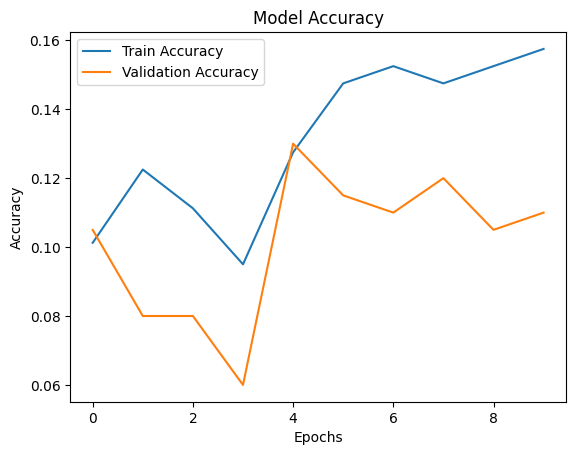

In [7]:
# Train the classifier layers
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# Unfreeze some of the last convolutional layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers; adjust as needed
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Continue training with fine-tuning
fine_tune_history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
25/25 [==============================] - 35s 1s/step - loss: 2.4219 - accuracy: 0.1063 - val_loss: 2.3484 - val_accuracy: 0.0900
Epoch 2/5
25/25 [==============================] - 29s 1s/step - loss: 2.3002 - accuracy: 0.1425 - val_loss: 2.3540 - val_accuracy: 0.0950
Epoch 3/5
25/25 [==============================] - 29s 1s/step - loss: 2.2386 - accuracy: 0.1825 - val_loss: 2.3591 - val_accuracy: 0.0900
Epoch 4/5
25/25 [==============================] - 29s 1s/step - loss: 2.1972 - accuracy: 0.2212 - val_loss: 2.3634 - val_accuracy: 0.0950
Epoch 5/5
25/25 [==============================] - 31s 1s/step - loss: 2.1624 - accuracy: 0.2575 - val_loss: 2.3641 - val_accuracy: 0.0950


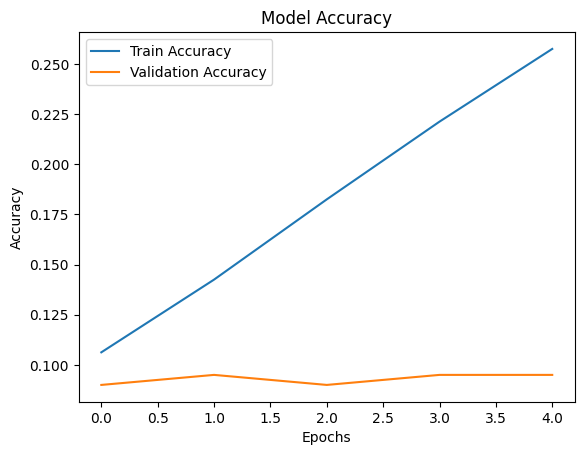

In [9]:
# Plot training history (optional)
plt.plot(fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()